2025-03-24 14:54:41.611 | INFO | chain_utils:load_hotkey_keypair:54 - Loaded keypair from /Users/matiasmartinez/.bittensor/wallets/sn165-validator/hotkeys/default
2025-03-24 14:54:41.612 | INFO | interface:_get_chain_endpoint:21 - Using the chain network: test and therefore chain address: wss://test.finney.opentensor.ai:443/
2025-03-24 14:54:44.812 | INFO | interface:get_substrate:36 - Connected to wss://test.finney.opentensor.ai:443/
2025-03-24 14:54:44.814 | INFO | metagraph:load_nodes:85 - Loading nodes from nodes.json
2025-03-24 14:54:44.815 | INFO | metagraph:sync_nodes:64 - Syncing nodes...
2025-03-24 14:54:44.816 | INFO | interface:_get_chain_endpoint:14 - Using chain address: wss://test.finney.opentensor.ai:443/
2025-03-24 14:54:47.270 | INFO | interface:get_substrate:36 - Connected to wss://test.finney.opentensor.ai:443/
2025-03-24 14:54:47.658 | INFO | metagraph:sync_nodes:68 - ✅ Successfully synced 105 nodes!
2025-03-24 14:54:47.660 | INFO | scorer:__init__:24 - Initialized 

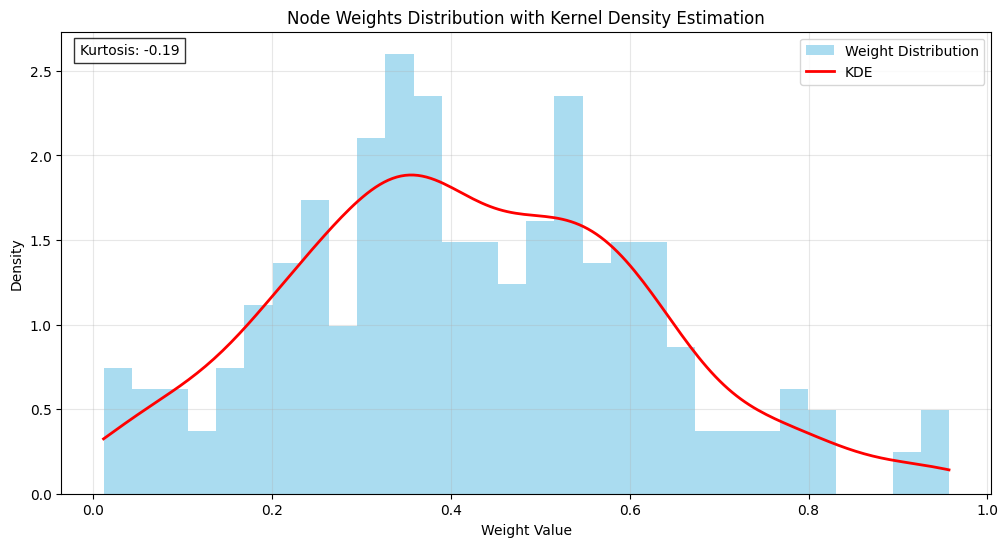

Average weight: 0.4200
Std deviation: 0.1998
Min weight: 0.0113
Max weight: 0.9572
Kurtosis: -0.1930


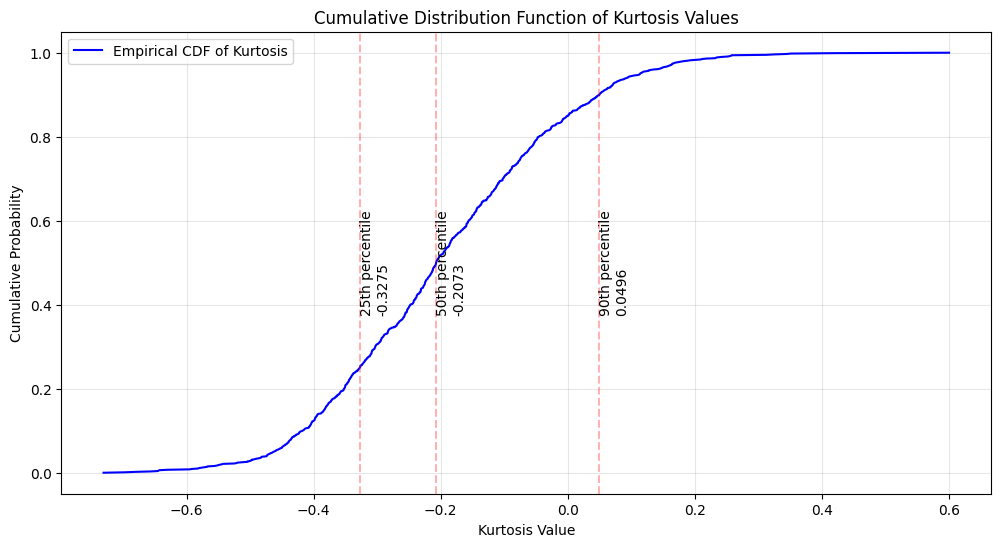


Kurtosis Percentile Statistics:
10th percentile: -0.4178
25th percentile: -0.3275
50th percentile: -0.2073
75th percentile: -0.0739
90th percentile: 0.0496


In [6]:
import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import matplotlib.pyplot as plt
from interfaces.types import NodeData
from neurons.validator import Validator
from validator.weights import WeightsManager
from scipy import stats

# Create simulated nodes
num_nodes = 256
nodes = []

for i in range(num_nodes):
    # Generate random stats within reasonable ranges
    nodes.append(NodeData(
        hotkey=f"5HEY73oKq1DmmX4YdWkDnC1wpTxbuMtkMmkdDyxGnQsPysVh",
        uid=i,
        boot_time=int(np.random.uniform(1000000, 2000000)),
        last_operation_time=int(np.random.uniform(1600000000, 1700000000)),
        current_time=int(np.random.uniform(1600000000, 1700000000)),
        twitter_auth_errors=int(np.random.uniform(0, 10)),
        twitter_errors=int(np.random.uniform(0, 20)), 
        twitter_ratelimit_errors=int(np.random.uniform(0, 5)),
        twitter_returned_other=int(np.random.uniform(0, 100)),
        twitter_returned_profiles=int(np.random.uniform(100, 1000)),
        twitter_returned_tweets=int(np.random.uniform(1000, 10000)),
        twitter_scrapes=int(np.random.uniform(100, 1000)),
        web_errors=int(np.random.uniform(0, 50)),
        web_success=int(np.random.uniform(1000, 10000)),
        timestamp=int(np.random.uniform(1600000000, 1700000000))
    ))

# Calculate weights
validator = Validator()
validator.weights_manager = WeightsManager(validator=validator)
uids, weights = validator.weights_manager.calculate_weights(nodes, simulation=True)

# Convert to numpy arrays if they aren't already
weights = np.array(weights)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram with density
plt.hist(weights, bins=30, density=True, alpha=0.7, color='skyblue', label='Weight Distribution')

# Calculate and plot the kernel density estimation
density = stats.gaussian_kde(weights)
xs = np.linspace(min(weights), max(weights), 200)
plt.plot(xs, density(xs), 'r-', lw=2, label='KDE')

plt.xlabel('Weight Value')
plt.ylabel('Density')
plt.title('Node Weights Distribution with Kernel Density Estimation')
plt.grid(True, alpha=0.3)
plt.legend()

# Calculate and display kurtosis
kurtosis = stats.kurtosis(weights)
plt.text(0.02, 0.95, f'Kurtosis: {kurtosis:.2f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print statistics
print(f"Average weight: {np.mean(weights):.4f}")
print(f"Std deviation: {np.std(weights):.4f}")
print(f"Min weight: {np.min(weights):.4f}")
print(f"Max weight: {np.max(weights):.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Generate multiple samples and calculate their kurtosis values
num_samples = 1000
sample_size = len(weights)
kurtosis_values = []

for _ in range(num_samples):
    sample = np.random.choice(weights, size=sample_size, replace=True)
    kurtosis_values.append(stats.kurtosis(sample))

# Sort kurtosis values and calculate CDF
sorted_kurtosis = np.sort(kurtosis_values)
cumulative = np.arange(1, len(sorted_kurtosis) + 1) / len(sorted_kurtosis)

plt.figure(figsize=(12, 6))
plt.plot(sorted_kurtosis, cumulative, 'b-', label='Empirical CDF of Kurtosis')
plt.xlabel('Kurtosis Value')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of Kurtosis Values')
plt.grid(True, alpha=0.3)
plt.legend()

# Add key percentile markers
percentiles = [25, 50, 90]
for p in percentiles:
    percentile_val = np.percentile(sorted_kurtosis, p)
    plt.axvline(x=percentile_val, color='r', linestyle='--', alpha=0.3)
    plt.text(percentile_val, 0.5, f'{p}th percentile\n{percentile_val:.4f}',
             rotation=90, verticalalignment='center')

plt.show()

# Print percentile statistics for kurtosis
print("\nKurtosis Percentile Statistics:")
for p in [10, 25, 50, 75, 90]:
    print(f"{p}th percentile: {np.percentile(sorted_kurtosis, p):.4f}")

# Create dot chart with sorted scores
plt.figure(figsize=(12, 6))
sorted_weights = np.sort(weights)
plt.plot(range(len(sorted_weights)), sorted_weights, 'bo-', markersize=4)
plt.xlabel('Node Rank')
plt.ylabel('Weight Value')
plt.title('Node Weights Sorted from Lowest to Highest')
plt.grid(True, alpha=0.3)
plt.show()
